In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf

In [2]:
df = yf.Ticker('AAPL')
df = df.history(start = '2015-01-01', end = '2020-02-04')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
Date,,,,,,,,,,
2015-01-02,102.35,102.39,98.64,100.45,53204600,0.0,0,2015,1,2
2015-01-05,99.50,99.83,96.85,97.62,64285500,0.0,0,2015,1,5
2015-01-06,97.89,98.71,96.14,97.63,65797100,0.0,0,2015,1,6
2015-01-07,98.50,99.42,98.04,99.00,40105900,0.0,0,2015,1,7
2015-01-08,100.36,103.05,99.88,102.81,59364500,0.0,0,2015,1,8


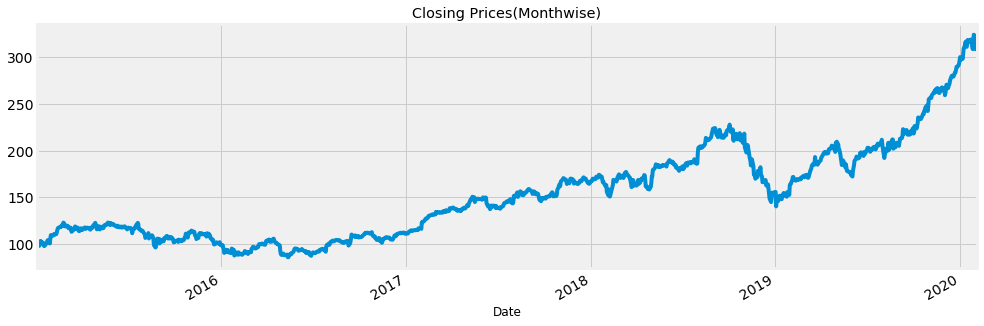

In [4]:
temp=df.groupby(['Date'])['Close'].mean() 
temp.plot(figsize=(15,5), title= 'Closing Prices(Monthwise)', fontsize=14)

In [5]:
train = df.loc[:'2018-12-31']
test = df.loc['2019-01-01':]

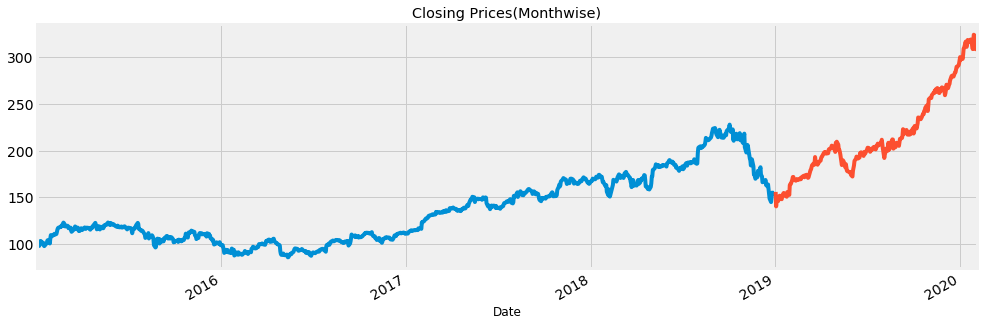

In [6]:
test_temp = test.groupby(['Date'])['Close'].mean()
train_temp = train.groupby(['Date'])['Close'].mean()
train_temp.plot(figsize=(15,5), title= 'Closing Prices(Monthwise)', fontsize=14)
test_temp.plot(figsize=(15,5), title= 'Closing Prices(Monthwise)', fontsize=14)


In [7]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

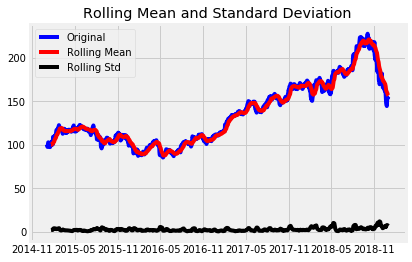

Results of dickey fuller test
Test Statistics                 -1.125793
p-value                          0.704677
No. of lags used                 8.000000
Number of observations used    997.000000
critical value (1%)             -3.436926
critical value (5%)             -2.864443
critical value (10%)            -2.568316
dtype: float64


In [8]:
test_stationarity(train['Close'])

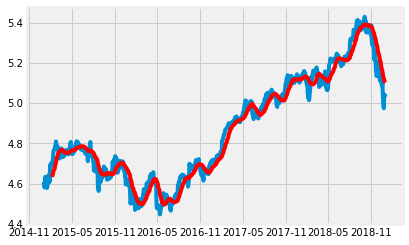

In [9]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [10]:
train_log_moving_avg_diff = train_log - moving_avg

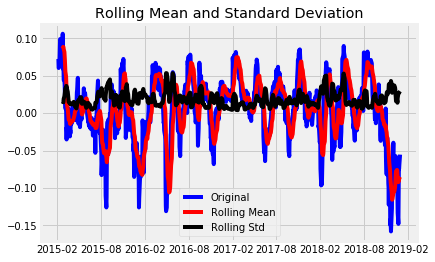

Results of dickey fuller test
Test Statistics                 -5.613109
p-value                          0.000001
No. of lags used                 1.000000
Number of observations used    981.000000
critical value (1%)             -3.437033
critical value (5%)             -2.864491
critical value (10%)            -2.568341
dtype: float64


(None, None)

In [11]:
train_log_moving_avg_diff.dropna(inplace = True), test_stationarity(train_log_moving_avg_diff)

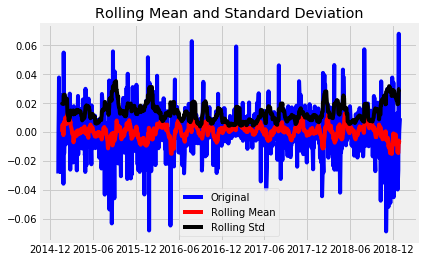

Results of dickey fuller test
Test Statistics                 -30.676111
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    1004.000000
critical value (1%)              -3.436880
critical value (5%)              -2.864423
critical value (10%)             -2.568305
dtype: float64


In [12]:
train_log_diff = train_log - train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

In [55]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

NameError: name 'residuals' is not defined

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-5527.261, BIC=-5497.785, Fit time=0.309 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5530.923, BIC=-5521.098, Fit time=0.123 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5530.019, BIC=-5515.280, Fit time=0.156 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5530.124, BIC=-5515.386, Fit time=0.238 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5532.125, BIC=-5527.213, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5528.305, BIC=-5508.654, Fit time=0.269 seconds
Total fit time: 1.146 seconds


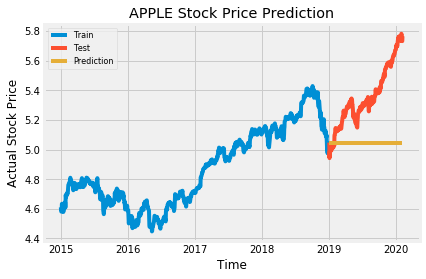

In [13]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()